<center><h1> - Bank marketing : Context Analysis- </h1></center>

* In this notebook we're going to examine the  
* We're also going to study the efficiency of this marketing approach and 

# 1-Client Behaviour
* The aim of this study is to determine what factors could influence customers' decision to either maintain their "term deposit" product or cancel it.
* We will be looking at our dataset in order to get more insights. 
* First we will take a peek at how does our data look then we will analyze each category of customers independetly (the categories are represented by the statut column).

### Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = "../data/processed/data_processed.csv"
marketing_df = pd.read_csv( path )
#display(marketing_df)

statut
Refus          19826
Absent         15907
Souscrit        5253
Suppression     3416
En Attente       734
Name: count, dtype: int64
********************
Conversion Rate: 11.64%
********************


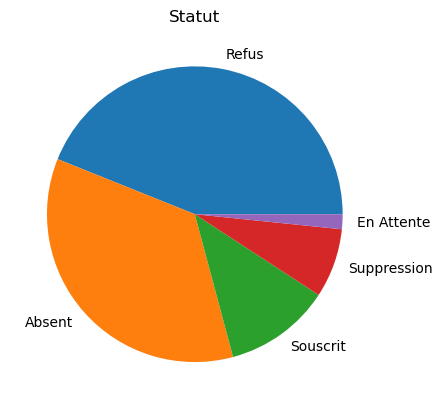

In [9]:
print(marketing_df["statut"].value_counts())
print("********************")
print("Conversion Rate: {:.2f}%".format(len(marketing_df[marketing_df['statut'] == 'Souscrit']) / len(marketing_df) * 100))
print("********************")
marketing_df["statut"].value_counts().plot(kind='pie')
plt.title("Statut")
plt.ylabel("")
plt.show()

count    45136.000000
mean        44.206354
std         19.149653
min         18.000000
25%         33.000000
50%         40.000000
75%         50.000000
max        123.000000
Name: age, dtype: float64


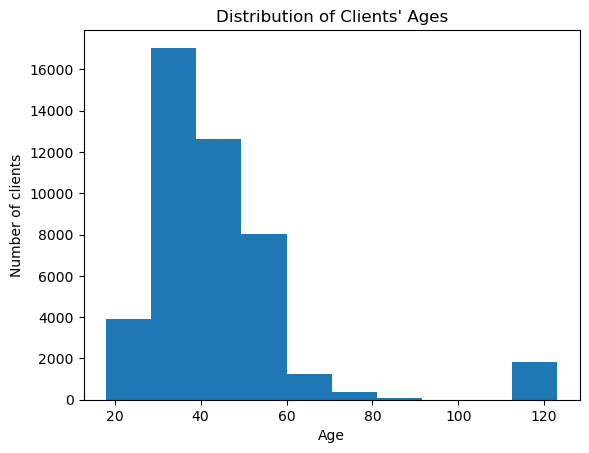

In [12]:
# Distribution of clients' ages
print(marketing_df["age"].describe())
marketing_df['age'].plot(kind="hist")
plt.xlabel('Age')
plt.ylabel('Number of clients')
plt.title('Distribution of Clients\' Ages')
plt.show()

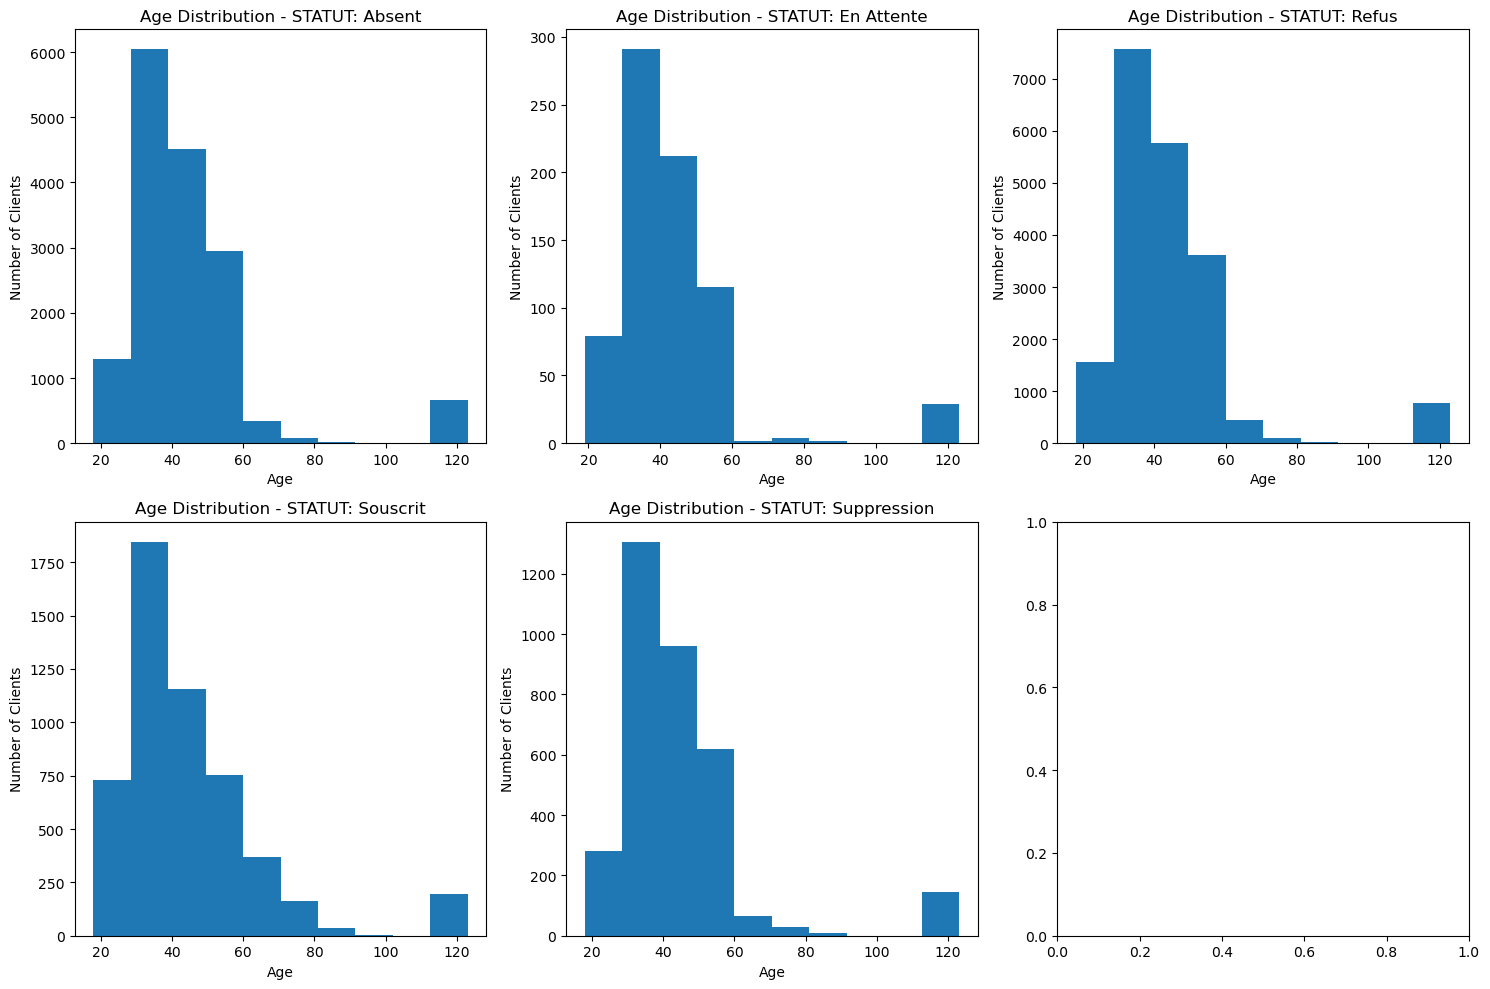

In [14]:
statut_groups = marketing_df.groupby('statut')
num_groups = len(statut_groups)
num_plots_per_line = 3
num_rows = num_groups // num_plots_per_line + (num_groups % num_plots_per_line > 0)

fig, axes = plt.subplots(num_rows, num_plots_per_line, figsize=(15, 5*num_rows))

for (statut, group), ax in zip(statut_groups, axes.flatten()):
    group['age'].plot(kind='hist', ax=ax)
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of Clients')
    ax.set_title('Age Distribution - STATUT: {}'.format(statut))

plt.tight_layout()
plt.show()

* We can see that the age distribution for all the categories are almost identical.
* However, we can notice that the subscribed population tends to be younger than other categories. 
In other words it is more likely that someone will subscribe to the term deposit product if they are young (especially between 20 and 30).

count     45136.000000
mean       1362.182847
std        3046.691765
min       -8019.000000
25%          72.000000
50%         447.500000
75%        1425.000000
max      102127.000000
Name: balance, dtype: float64


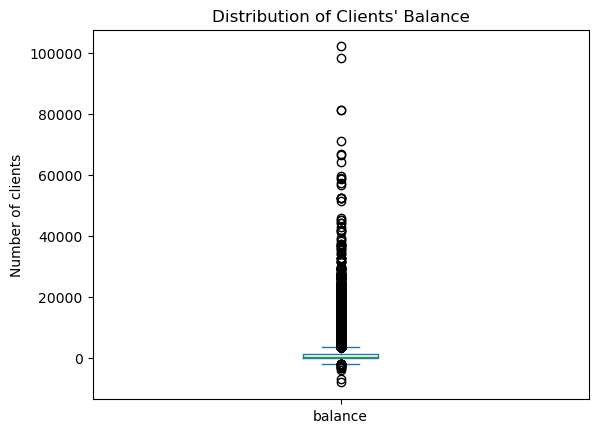

In [16]:
# Distribution of clients' balance
print(marketing_df["balance"].describe())
marketing_df['balance'].plot(kind="box")
plt.ylabel('Number of clients')
plt.title('Distribution of Clients\' Balance')
plt.show()

Concedering that 75% of the clients have a balance of less than 1500, we can say that the outliers are quite noticeable. To have a better visualization and conclusions, we will remove the outliers.

count    40402.000000
mean       639.091035
std        842.705595
min      -1944.000000
25%         46.000000
50%        348.000000
75%        979.000000
max       3452.000000
Name: balance, dtype: float64


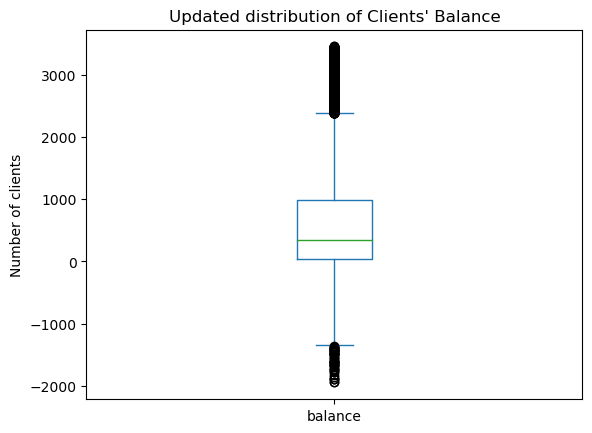

In [20]:
# Calculate the lower and upper thresholds for outliers
lower_threshold = marketing_df['balance'].quantile(0.25) - 1.5 * (marketing_df['balance'].quantile(0.75) - marketing_df['balance'].quantile(0.25))
upper_threshold = marketing_df['balance'].quantile(0.75) + 1.5 * (marketing_df['balance'].quantile(0.75) - marketing_df['balance'].quantile(0.25))
filtered_data = marketing_df[(marketing_df['balance'] >= lower_threshold) & (marketing_df['balance'] <= upper_threshold)].copy()

# Distribution of clients' balance
print(filtered_data["balance"].describe())
filtered_data['balance'].plot(kind="box")
plt.ylabel('Number of clients')
plt.title('Updated distribution of Clients\' Balance')
plt.show()

* We can conclude that people with average account balance tend to invest more in Term deposit. 
* This makes total sense since the term deposits are considered to be low-risk investments because the principal amount is generally protected, and the interest rates are typically fixed for the duration of the deposit. 
* In return for leaving the money invested for the agreed term, the financial institution offers a higher interest rate compared to a regular savings account. 
* This makes term deposits an attractive option for individuals and businesses looking for a secure way to earn interest on their savings or temporarily park their funds.

relation
Marié            26500
Célibataire      12462
Divorcé           5046
not available     1128
Name: count, dtype: int64


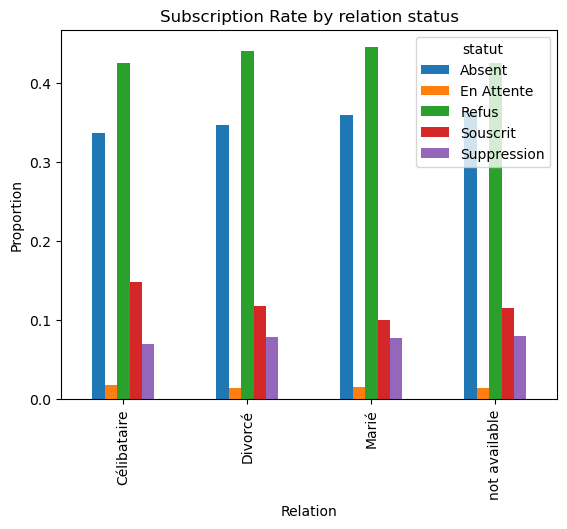

In [22]:
print( marketing_df["relation"].value_counts())
subscription_by_education =  marketing_df.groupby('relation')['statut'].value_counts(normalize=True).unstack()
subscription_by_education.plot(kind='bar')
plt.xlabel('Relation')
plt.ylabel('Proportion')
plt.title('Subscription Rate by relation status')
plt.show()

* According to this plot we can safely conclude that Relation status has nearly no influence on the decision the individual will take.
* However we notice that single people tend to subscribe more than married people (which is also true concerning divorced people). 
* This would make sense as single people tend to have less financial responsibilities and could take more risk.

education
Secondaire       23165
Tertiaire        13272
Primaire          6846
not available     1853
Name: count, dtype: int64


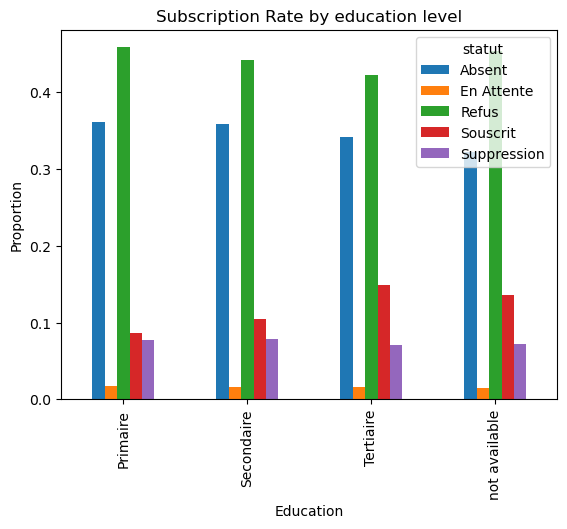

In [24]:
print( marketing_df["education"].value_counts())
subscription_by_education =  marketing_df.groupby('education')['statut'].value_counts(normalize=True).unstack()
subscription_by_education.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.title('Subscription Rate by education level')
plt.show()

* We can notice that people with higher education level tend to subsribe more than other groups. 

job
Col bleu             9726
Manager              9445
Technicien           7586
Admin                5161
Services             4148
Retraité             2252
Indépendant          1577
Entrepreuneur        1483
Chomeur              1301
Employé de ménage    1239
Etudiant              932
Autres                286
Name: count, dtype: int64


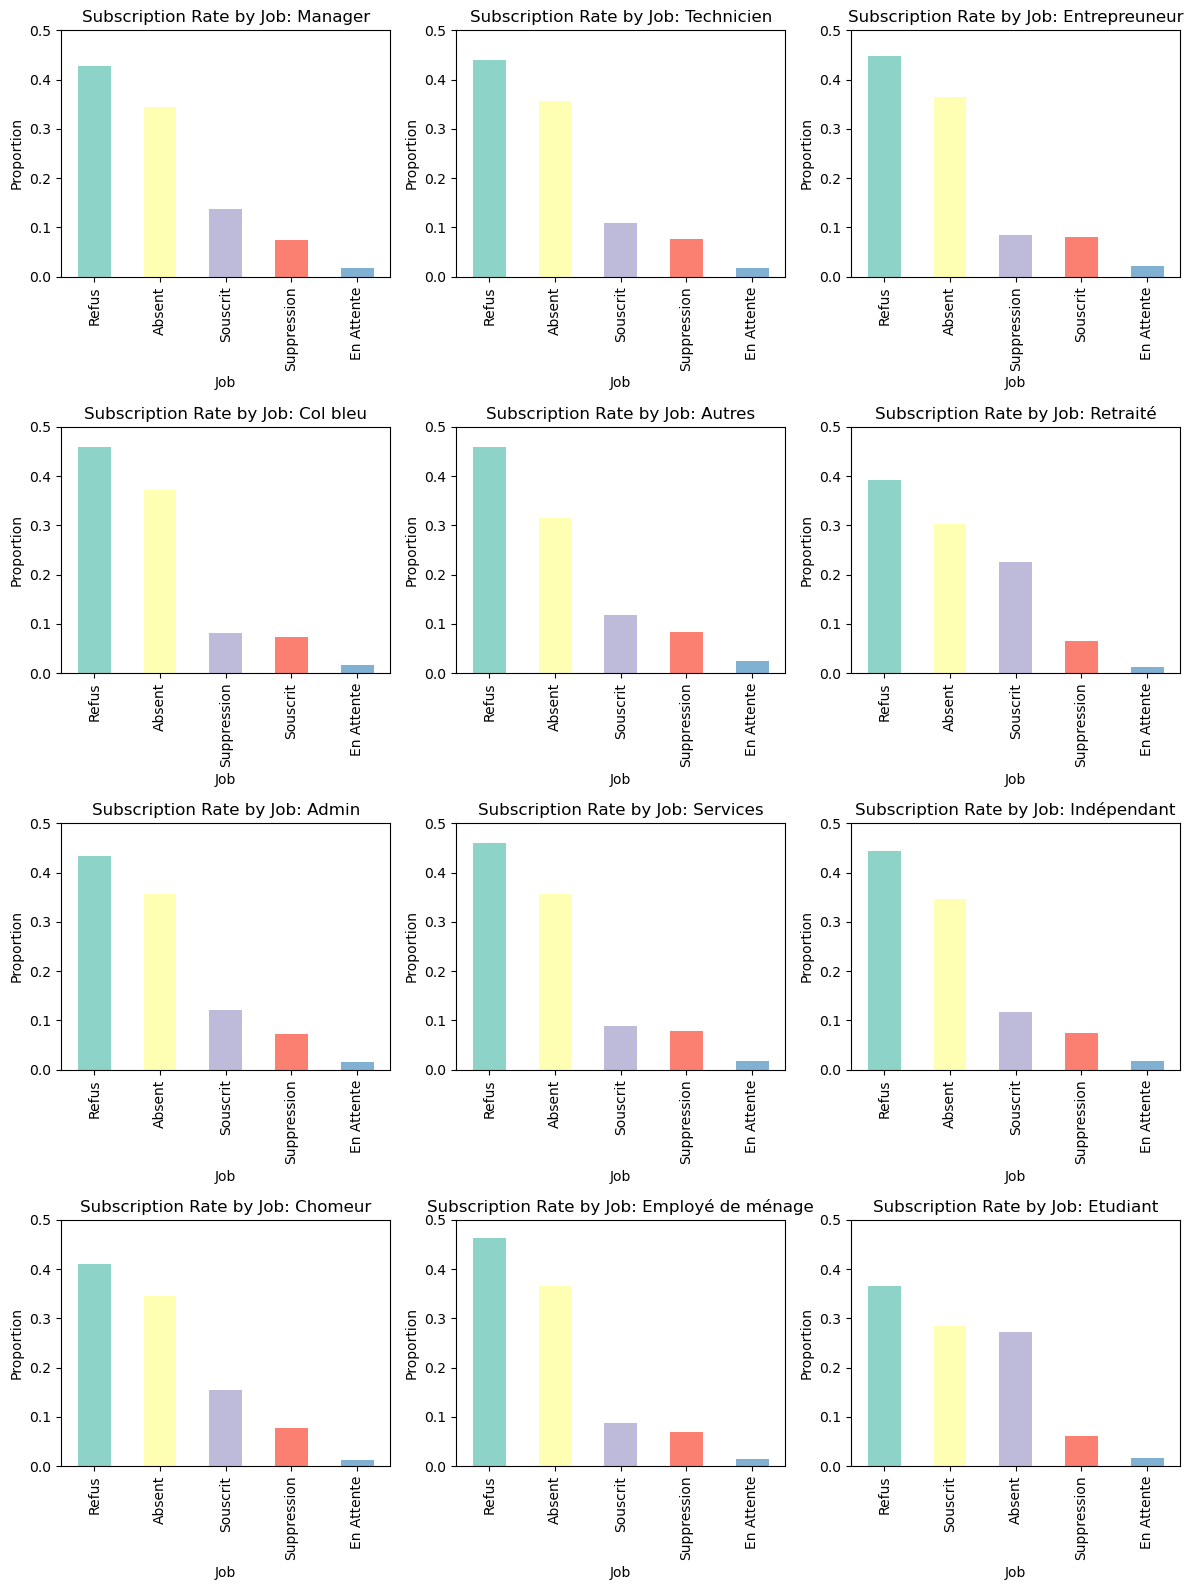

In [28]:
print(marketing_df["job"].value_counts())

jobs = marketing_df["job"].unique()

num_plots = len(jobs)
num_rows = int(np.ceil(num_plots / 3))
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.4)

# Define a color palette for the STATUT categories
color_palette = sns.color_palette("Set3", len(marketing_df["statut"].unique()))

for i, job in enumerate(jobs):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]

    subscription_by_statut = marketing_df.loc[marketing_df["job"] == job, "statut"].value_counts(normalize=True)
    subscription_by_statut.plot(kind='bar', ax=ax, color=color_palette)
    ax.set_xlabel('Job')
    ax.set_ylabel('Proportion')
    ax.set_title('Subscription Rate by Job: ' + job)
    ax.set_ylim(top=0.5)  # Set minimum Y-axis value to 0.5

plt.tight_layout()
plt.show()

* We can conclude that each job has its own specific features when it comes to term deposit subscription. 
* We can see that the occupations with the largest percentage for subcsription are student, retired and unemployed. 
* Such results could be interpreted differently for each group. Blue collar jobs are the least likely to make a subscription with less than 10% of the sample. Other occupations are almost at 13% subscription rate.

pret_immo
Yes    25109
No     20027
Name: count, dtype: int64


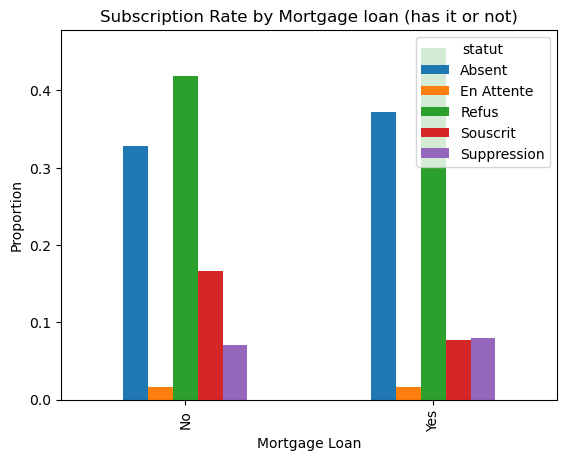

In [31]:
print(marketing_df["pret_immo"].value_counts(dropna=False))
subscription_by_education = marketing_df.groupby('pret_immo')['statut'].value_counts(normalize=True).unstack()
subscription_by_education.plot(kind='bar')
plt.xlabel('Mortgage Loan')
plt.ylabel('Proportion')
plt.title('Subscription Rate by Mortgage loan (has it or not)')
plt.show()

pret_perso
No               36761
Yes               7021
not available     1354
Name: count, dtype: int64


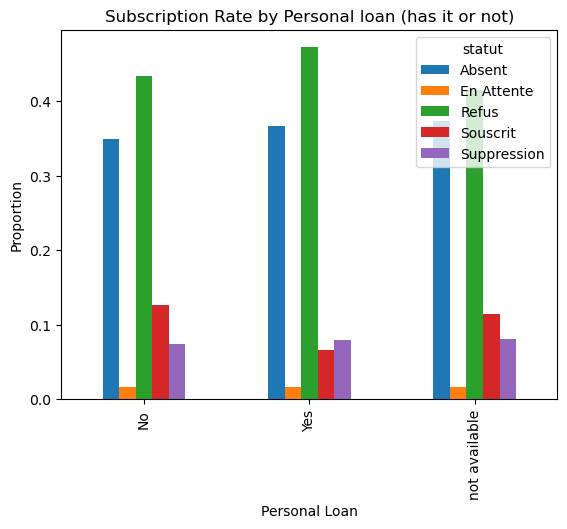

In [33]:
print(marketing_df["pret_perso"].value_counts(dropna=False))
subscription_by_education = marketing_df.groupby('pret_perso')['statut'].value_counts(normalize=True).unstack()
subscription_by_education.plot(kind='bar')
plt.xlabel('Personal Loan')
plt.ylabel('Proportion')
plt.title('Subscription Rate by Personal loan (has it or not)')
plt.show()

* We can see that almost half the clients have a mortgage loan but only a small percentage have a personal loan. 
* As expected, when someone do not have a loan, they are more likely to subscribe for term deposit product. This makes sense since they would have extra income for investement

# 2- Bank Behaviour

* In this section we will study how the bank actions affected the outcome.
* First we will see if contacting a customer during the last compaign had any significant impact on the current result.

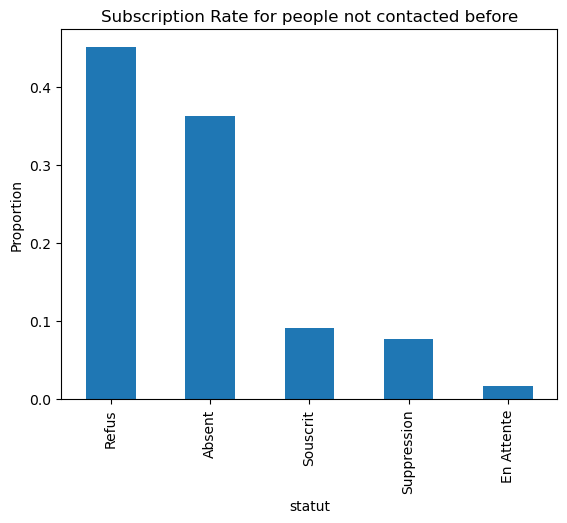

In [36]:
subscription_by_education = marketing_df.loc[marketing_df["resultat_derniere_campagne"]=="not contacted","statut"].value_counts(normalize=True)
subscription_by_education.plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Subscription Rate for people not contacted before')
plt.show()

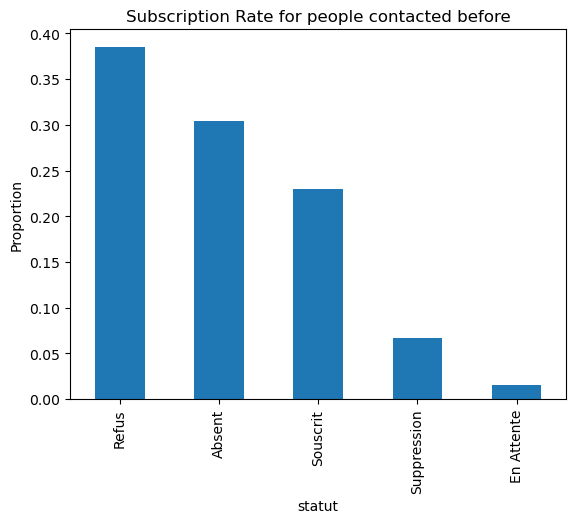

In [37]:
subscription_by_education = marketing_df.loc[marketing_df["resultat_derniere_campagne"]!="not contacted","statut"].value_counts(normalize=True)
subscription_by_education.plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Subscription Rate for people contacted before')
plt.show()

We can see that people contacted before are almost twice as more likely to subscribe regardless of the outcome of the last compaign.

# 3- The ideal martketing approach 